## Statistik Komputasi

- Nama : Mochammad Arya Salsabila
- NPM : 19081010001
- Kelas : Statistik Komputasi (D)
- Judul : Berapa Menit Anda Ngoding Dalam Satu Minggu

## Import Library

[math](https://docs.python.org/3/library/math.html) | [NumPy](https://numpy.org/) | [Pandas](https://pandas.pydata.org/) | [Matplotlib](https://matplotlib.org/)

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline 

## Inisialisasi Data Survei dari Excel

In [2]:
df = pd.read_csv("coding.csv")
data = df["Berapa Menit Anda Ngoding Dalam Satu Minggu"].tolist()

## Mean (nilai rata-rata)

$\large \bar{x} = \frac{x_1 + x_2 + x_3 + ... + x_n}{n} = \frac{1}{n} \sum \limits^{n}_{i=1} x_i$

In [3]:
def mean(numbers):
    return sum(numbers) / len(numbers)

## Median (nilai tengah)

- Median dari data (n) ganjil:
  - $\large Me = x (\frac{n+1}{2})$
  
- Median dari data (n) genap:
  - $\large Me = \frac{1}{2} (x (\frac{n}{2}) + (\frac{n}{2} + 1))$

In [4]:
def median(numbers):
    n = len(numbers)
    if n % 2:
        return sorted(numbers) [n//2]
    else:
        x = sorted(numbers) [(n//2)-1]
        y = sorted(numbers) [n//2]
        return (x+y)/2

## Modus

Nilai yang sering muncul dari suatu data.

In [5]:
def mode(numbers):
    mode = [0, 0]
    for num in numbers:
        frequency = numbers.count(num)
        if (frequency >= mode[1]):
            mode = [num, frequency]
    return mode[0]

## Varian

$\large s^2 = \frac{n \sum \limits^{n}_{i=1} x_i^2 - (\sum \limits^{n}_{i=1} x_1)^2}{n(n-1)}$

In [6]:
def var(numbers):
    n = len(numbers)
    squares = [num**2 for num in data]
    return ((n*sum(squares)) - (sum(numbers)**2)) / (n*(n-1))

## Standar Deviasi / Simpangan Baku

$\large s = \sqrt{ \frac{n \sum \limits^{n}_{i=1} x_i^2 - (\sum \limits^{n}_{i=1} x_1)^2}{n(n-1)}}$

In [7]:
def stdev(var):
    return var**0.5

## Kuartil Bawah (Q1)

$\large x_n = \frac{1}{4}n$

$\large Q1 = x_n + 0,25 (x_{n+1} - x_n)$

In [8]:
def lower_quartile(numbers):
    n = len(numbers)
    return numbers[n//4-1] + 0.25 * (numbers[n//4] - numbers[n//4-1])

## Kuartil Atas (Q3)

$\large x_n = \frac{3}{4}n$

$\large Q3 = x_n + 0,75 (x_{n+1} - x_n)$

In [9]:
def upper_quartile(numbers):
    n = len(numbers)
    return numbers[(n*3)//4-1] + 0.75 * (numbers[(n*3)//4] - numbers[(n*3)//4-1])

## Range / Rentang Data

$\large R = nilai_{maksimal} - nilai_{minimal}$

In [10]:
def class_range(numbers):
    return max(numbers) - min(numbers)

## Banyaknya Kelas

$\large K = 1 + 3,3\log(n)$

In [11]:
def number_of_classes(numbers):
    return round(1 + 3.3 * math.log10(len(numbers)))

## Panjang Interval Kelas

$\large P = \frac{R}{K}$

In [12]:
def class_length(class_range, number_of_classes):
    return round(class_range / number_of_classes)

## Batas Kelas, Tepi Kelas, & Interval Kelas

In [13]:
def class_limit(numbers, number_of_classes, class_length):
    bot_limit = [0]*number_of_classes
    top_limit = [0]*number_of_classes
    for i in range(number_of_classes):
        if (i == 0):
            bot_limit[i] = min(numbers)
            top_limit[i] = min(numbers) + (class_length-1)
        else:
            bot_limit[i] = bot_limit[i-1] + class_length
            top_limit[i] = top_limit[i-1] + class_length
    return bot_limit, top_limit

def class_edge(class_limit, number_of_classes):
    bot_limit = class_limit[0]
    top_limit = class_limit[1]
    bot_edge = [0]*number_of_classes
    top_edge = [0]*number_of_classes
    for i in range(number_of_classes):
        bot_edge[i] = bot_limit[i] - 0.5
        top_edge[i] = top_limit[i] + 0.5
    return bot_edge, top_edge

def class_interval(class_limit):
    bot_limit = class_limit[0]
    top_limit = class_limit[1]
    interval = [0]*len(class_limit[0])
    for i in range(len(class_limit[0])):
        interval[i] = "%3d - %3d" % (bot_limit[i], top_limit[i])
    return interval

## Frekuensi, Frekuensi Kumulatif, Frekuensi Relatif, & Frekuensi Relatif Kumulatif

In [14]:
def frequency(numbers, number_of_classes, class_limit):
    bot_limit = class_limit[0]
    top_limit = class_limit[1]
    frequency = [0]*number_of_classes
    for i in range(number_of_classes):
        for j in range(len(numbers)):
            if (numbers[j] >= bot_limit[i] and 
                numbers[j] <= top_limit[i]):
                frequency[i] += 1
    return frequency

def cumulative_frequency(freq):
    cumulative_freq1 = [0]*len(freq)
    cumulative_freq2 = [0]*len(freq)
    for i in range(len(freq)):
        if (i == 0):
            cumulative_freq1[i] = freq[i]
            cumulative_freq2[i] = sum(freq)
        else:
            cumulative_freq1[i] = cumulative_freq1[i-1] + freq[i]
            cumulative_freq2[i] = cumulative_freq2[i-1] - freq[i-1]
    return cumulative_freq1, cumulative_freq2

def relative_frequency(freq):
    relative_freq = [0]*len(freq)
    for i in range(len(freq)):
        relative_freq[i] = int((freq[i] / sum(freq)) * 100)
    return relative_freq

def cumulative_relative_frequency(freq, cumulative_freq):
    cumulative_freq1 = cumulative_freq[0]
    cumulative_freq2 = cumulative_freq[1]
    relative_cumulative_freq1 = [0]*len(freq)
    relative_cumulative_freq2 = [0]*len(freq)
    for i in range(len(freq)):
        relative_cumulative_freq1[i] = int((cumulative_freq1[i] / sum(freq)) * 100)
        relative_cumulative_freq2[i] = int((cumulative_freq2[i] / sum(freq)) * 100)
    return relative_cumulative_freq1, relative_cumulative_freq2

## Fungsi lain-lain

In [15]:
def xticks(class_edge):
    bot_edge = class_edge[0]
    top_edge = class_edge[1]
    ticks = [0]*len(class_edge[0])
    for i in range(len(class_edge[0])):
        ticks[i] = bot_edge[i]
    ticks.append(top_edge[-1])
    return ticks

def print_data_processing(mean, median, mode, quart1, quart3, var, stdev, 
                          class_range, number_of_classes, class_length):
    print("Mean               : " + str(mean))
    print("Median             : " + str(median))
    print("Modus              : " + str(mode))
    print("Kuartil Bawah (Q1) : " + str(quart1))
    print("Kuartil atas  (Q3) : " + str(quart3))
    print("Varian             : " + str(var))
    print("Standar Deviasi    : " + str(stdev))
    print("Rentang Kelas      : " + str(class_range))
    print("Banyak Kelas       : " + str(number_of_classes))
    print("Panjang Kelas      : " + str(class_length))

## Fungsi Menampilkan Grafik Histogram

In [16]:
def draw_hist():
    data2 = np.array(data)
    
    plt.style.use("seaborn")
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    ax[0, 0].hist(data, bins=class_, edgecolor="white", color="turquoise")
    ax[0, 0].set_xticks(xticks(edge))
    ax[0, 0].set_title("Distribusi Frekuensi")
    ax[0, 0].set_xlabel("Interval Kelas")
    ax[0, 0].set_ylabel("Frekuensi")

    ax[0, 1].hist(data, bins=class_, edgecolor="white", color="darkslateblue",
                  cumulative=True, alpha=0.75, label="Fk ≤")
    ax[0, 1].hist(data, bins=class_, edgecolor="white", color="turquoise",
                  cumulative=-1, alpha=0.75, label="Fk ≥")
    ax[0, 1].legend(loc="best")
    ax[0, 1].set_xticks(xticks(edge))
    ax[0, 1].set_title("Distribusi Frekuensi Kumulatif")
    ax[0, 1].set_xlabel("Interval Kelas")
    ax[0, 1].set_ylabel("Frekuensi")

    ax[1, 0].hist(data2, bins=class_, edgecolor="white", color="turquoise",
                  weights=np.zeros_like(data2) + 100. / data2.size)
    ax[1, 0].set_xticks(xticks(edge))
    ax[1, 0].set_title("Distribusi Frekuensi Relatif")
    ax[1, 0].set_xlabel("Interval Kelas")
    ax[1, 0].set_ylabel("Frekuensi")

    ax[1, 1].hist(data2, bins=class_, edgecolor="white", color="darkslateblue",
                  cumulative=True, alpha=0.75, label="Fk ≤",
                  weights=np.zeros_like(data2) + 100. / data2.size)
    ax[1, 1].hist(data2, bins=class_, edgecolor="white", color="turquoise",
                  cumulative=-1, alpha=0.75, label="Fk ≥",
                  weights=np.zeros_like(data2) + 100. / data2.size)
    ax[1, 1].legend(loc="best")
    ax[1, 1].set_xticks(xticks(edge))
    ax[1, 1].set_title("Distribusi Frekuensi Relatif Kumulatif")
    ax[1, 1].set_xlabel("Interval Kelas")
    ax[1, 1].set_ylabel("Frekuensi")

    plt.show()

## Fungsi Menampilkan Grafik Lingkaran

In [17]:
def draw_pie():
    colors1 = ["yellowgreen", "gold", "lightskyblue", "lightcoral", "lightgreen",
               "pink", "cyan"]
    colors2 = ["cornflowerblue", "mediumseagreen", "indianred", "orchid",
               "burlywood", "skyblue", "orange"]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    ax[0, 0].pie(freq, autopct="%1.1f%%", colors=colors1,
                 wedgeprops = {"linewidth" : "3","edgecolor" : "white"})
    ax[0, 0].legend(labels=interval, loc="right", bbox_to_anchor=(1.3, 0.5))
    ax[0, 0].set_title("Distribusi Frekuensi")

    ax[0, 1].pie(cumulative_freq[1], autopct="%1.1f%%",
                 radius=1.05, pctdistance=0.8, colors=colors1,
                 wedgeprops = {"linewidth" : "3", "edgecolor" : "white"})
    ax[0, 1].pie(cumulative_freq[0], autopct="%1.1f%%",
                 radius=0.7, pctdistance=0.7, colors=colors2,
                 wedgeprops = {"linewidth" : "3", "edgecolor" : "white"})
    ax[0, 1].legend(labels=cumulative_frequency_distribution[
                    ["Lebih Dari", "Kurang Dari"]].values.T.ravel().tolist(),
                    loc="right", bbox_to_anchor=(1.3, 0.5))
    ax[0, 1].set_title("Distribusi Frekuensi Kumulatif")

    ax[1, 0].pie(relative_freq, autopct="%1.1f%%", colors=colors1,
                 wedgeprops = {"linewidth" : "3", "edgecolor" : "white"})
    ax[1, 0].legend(labels=interval, loc="right", bbox_to_anchor=(1.3, 0.5))
    ax[1, 0].set_title("Distribusi Frekuensi Relatif")

    ax[1, 1].pie(cumulative_relative_freq[1], autopct="%1.1f%%",
                 radius=1.05, pctdistance=0.8, colors=colors1,
                 wedgeprops = {"linewidth" : "3", "edgecolor" : "white"})
    ax[1, 1].pie(cumulative_relative_freq[0], autopct="%1.1f%%",
                 radius=0.7, pctdistance=0.7, colors=colors2,
                 wedgeprops = {"linewidth" : "3", "edgecolor" : "white"})
    ax[1, 1].legend(labels=cumulative_relative_frequency_distribution[
                    ["Lebih Dari", "Kurang Dari"]].values.T.ravel().tolist(),
                    loc="right", bbox_to_anchor=(1.3, 0.5))
    ax[1, 1].set_title("Distribusi Frekuensi Relatif Kumulatif")

    plt.show()

## Fungsi Menampilkan Grafik Ogive

In [18]:
def draw_ogive():
    plt.style.use("seaborn")
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

    ax[0, 0].plot(interval, freq)
    ax[0, 0].set_title("Distribusi Frekuensi")
    ax[0, 0].set_xlabel("Interval Kelas")
    ax[0, 0].set_ylabel("Frekuensi")

    ax[0, 1].plot(interval, cumulative_freq[0], label="Ogive Positif")
    ax[0, 1].plot(interval, cumulative_freq[1], label="Ogive Negatif")
    ax[0, 1].legend(loc="best")
    ax[0, 1].set_title("Distribusi Frekuensi Kumulatif")
    ax[0, 1].set_xlabel("Interval Kelas")
    ax[0, 1].set_ylabel("Frekuensi Kumulatif")

    ax[1, 0].plot(interval, relative_freq)
    ax[1, 0].set_title("Distribusi Frekuensi Relatif")
    ax[1, 0].set_xlabel("Interval Kelas")
    ax[1, 0].set_ylabel("Frekuensi")

    ax[1, 1].plot(interval, cumulative_relative_freq[0], label="Ogive Positif")
    ax[1, 1].plot(interval, cumulative_relative_freq[1], label="Ogive Negatif")
    ax[1, 1].legend(loc="best")
    ax[1, 1].set_title("Distribusi Frekuensi Relatif Kumulatif")
    ax[1, 1].set_xlabel("Interval Kelas")
    ax[1, 1].set_ylabel("Frekuensi Kumulatif")

    plt.show()

## Deklarasi Variabel & Pemanggilan Fungsi

In [19]:
mean_ = mean(data)
median_ = median(data)
mode_ = mode(data)
q1_ = lower_quartile(data)
q3_ = upper_quartile(data)
var_ = var(data)
std_ = stdev(var_)

range_ = class_range(data)
class_ = number_of_classes(data)
length_ = class_length(range_, class_)

limit = class_limit(data, class_, length_)
edge = class_edge(limit, class_)
freq = frequency(data, class_, limit)
cumulative_freq = cumulative_frequency(freq)
relative_freq = relative_frequency(freq)
cumulative_relative_freq = cumulative_relative_frequency(freq, cumulative_freq)
interval = class_interval(limit)

## Membuat Tabel dengan Dataframe

In [20]:
frequency_distribution = pd.DataFrame({
    "Interval Kelas" : interval, 
    "Frekuensi" : freq
})

cumulative_frequency_distribution = pd.DataFrame({
    "Interval Kelas" : interval, 
    "Kurang Dari" : edge[0],
    "Fk ≤" : cumulative_freq[0],
    "Lebih Dari" : edge[1],
    "Fk ≥" : cumulative_freq[1]
})
cumulative_frequency_distribution["Kurang Dari"] = \
    "≤ "+ cumulative_frequency_distribution["Kurang Dari"].astype(str)
cumulative_frequency_distribution["Lebih Dari"] = \
    "≥ " + cumulative_frequency_distribution["Lebih Dari"].astype(str)

relative_frequency_distribution = pd.DataFrame({
    "Interval Kelas" : interval, 
    "Frekuensi" : freq,
    "Persentase (%)" : relative_freq
})
relative_frequency_distribution["Persentase (%)"] = \
    relative_frequency_distribution["Persentase (%)"].astype(str) + "%"

cumulative_relative_frequency_distribution = pd.DataFrame({
    "Interval Kelas" : interval, 
    "Kurang Dari" : edge[0],
    "Fk ≤ (%)" : cumulative_relative_freq[0],
    "Lebih Dari" : edge[1],
    "Fk ≥ (%)" : cumulative_relative_freq[1]
})
cumulative_relative_frequency_distribution["Fk ≤ (%)"] = \
    cumulative_relative_frequency_distribution["Fk ≤ (%)"].astype(str) + "%"
cumulative_relative_frequency_distribution["Fk ≥ (%)"] = \
    cumulative_relative_frequency_distribution["Fk ≥ (%)"].astype(str) + "%"
cumulative_relative_frequency_distribution["Kurang Dari"] = \
    "≤ " + cumulative_relative_frequency_distribution["Kurang Dari"].astype(str)
cumulative_relative_frequency_distribution["Lebih Dari"] = \
    "≥ " + cumulative_relative_frequency_distribution["Lebih Dari"].astype(str)

## Data Hasil Survei

In [21]:
df

,Nama Lengkap,No KTP / NPM,Kecamatan,Kabupaten / Kota,Berapa Menit Anda Ngoding Dalam Satu Minggu
0,Mohammad Khairil Amin,19081010004,Kecamatan Kota Sumenep,Kabupaten Sumenep,20
1,Nizar Abdurrahman,19081010025,Beji,Pasuruan,30
2,Agung Rahmawan Gading,19081010161,Tambak Sari,Surabaya,30
3,Lusian Nandang Arjamulia,19081010070,Maos,Cilacap,45
4,Muhammad Helmi,19081010111,Suko,Sidoarjo,45
5,Arya Fadhilah Daniswara,19081010187,Karang pilang,Surabaya,60
6,Nadhif Mahardika Awandi,19081010064,Taktakan,Serang,60
7,Muhammad Rayhan Rachmansyah,19081010002,Sedati,Sidoarjo,75
8,Octavianus Fian,19081010096,Rungkut,Surabaya,100
9,Achmad Yuneda Alfajr,19081010128,Buduran,Sidoarjo,100


## Pengolahan Data

In [22]:
print_data_processing(mean_, median_, mode_, q1_, q3_, var_, std_, range_, class_, length_)

Mean               : 350.4
Median             : 240.0
Modus              : 420
Kuartil Bawah (Q1) : 120.0
Kuartil atas  (Q3) : 518.75
Varian             : 73114.12244897959
Standar Deviasi    : 270.3962323128405
Rentang Kelas      : 880
Banyak Kelas       : 7
Panjang Kelas      : 126


## Tabel Distribusi Frekuensi

In [23]:
frequency_distribution

,Interval Kelas,Frekuensi
0,20 - 145,15
1,146 - 271,11
2,272 - 397,2
3,398 - 523,9
4,524 - 649,4
5,650 - 775,3
6,776 - 901,6


## Tabel Distribusi Frekuensi Kumulatif

In [24]:
cumulative_frequency_distribution

,Interval Kelas,Kurang Dari,Fk ≤,Lebih Dari,Fk ≥
0,20 - 145,≤ 19.5,15,≥ 145.5,50
1,146 - 271,≤ 145.5,26,≥ 271.5,35
2,272 - 397,≤ 271.5,28,≥ 397.5,24
3,398 - 523,≤ 397.5,37,≥ 523.5,22
4,524 - 649,≤ 523.5,41,≥ 649.5,13
5,650 - 775,≤ 649.5,44,≥ 775.5,9
6,776 - 901,≤ 775.5,50,≥ 901.5,6


## Tabel Distribusi Frekuensi Relatif

In [25]:
relative_frequency_distribution

,Interval Kelas,Frekuensi,Persentase (%)
0,20 - 145,15,30%
1,146 - 271,11,22%
2,272 - 397,2,4%
3,398 - 523,9,18%
4,524 - 649,4,8%
5,650 - 775,3,6%
6,776 - 901,6,12%


## Tabel Distribusi Frekuensi Relatif Kumulatif

In [26]:
cumulative_relative_frequency_distribution

,Interval Kelas,Kurang Dari,Fk ≤ (%),Lebih Dari,Fk ≥ (%)
0,20 - 145,≤ 19.5,30%,≥ 145.5,100%
1,146 - 271,≤ 145.5,52%,≥ 271.5,70%
2,272 - 397,≤ 271.5,56%,≥ 397.5,48%
3,398 - 523,≤ 397.5,74%,≥ 523.5,44%
4,524 - 649,≤ 523.5,82%,≥ 649.5,26%
5,650 - 775,≤ 649.5,88%,≥ 775.5,18%
6,776 - 901,≤ 775.5,100%,≥ 901.5,12%


## Diagram Histogram

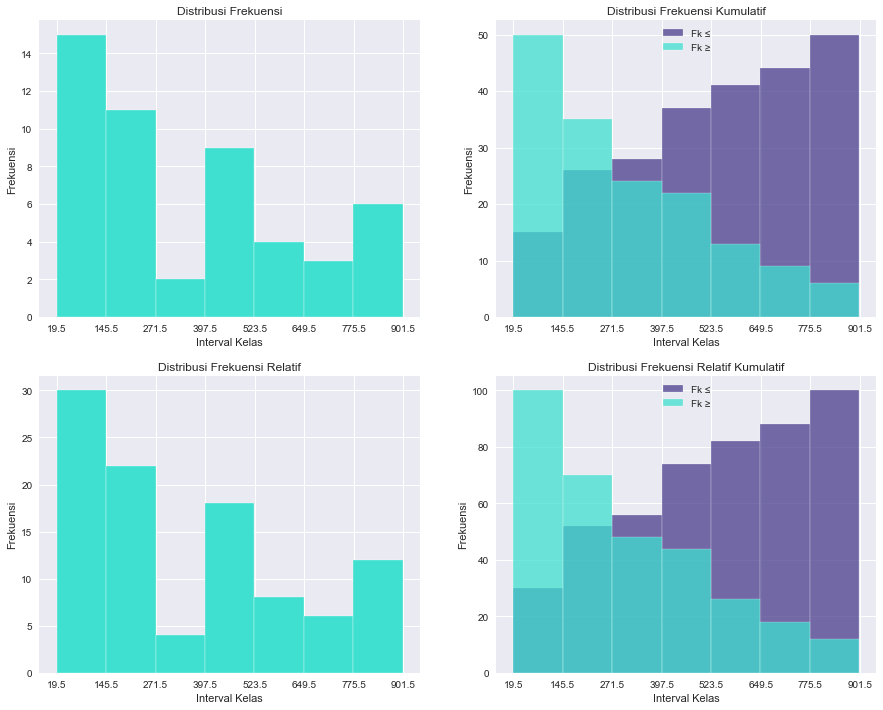

In [27]:
draw_hist()

## Diagram Lingkaran

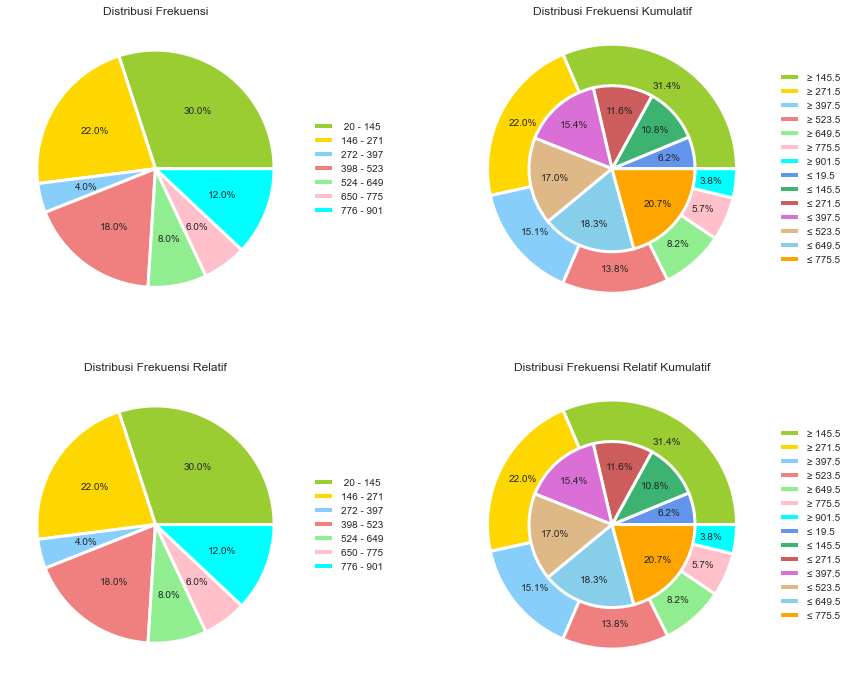

In [28]:
draw_pie()

## Diagram Ogive

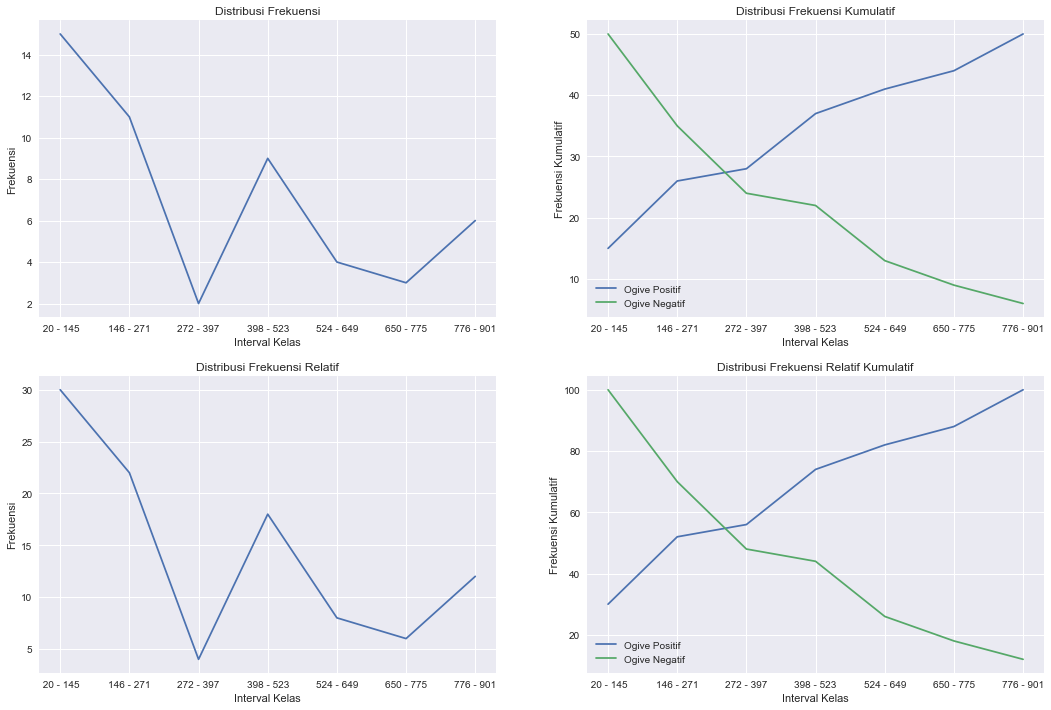

In [29]:
draw_ogive()